<h1 style="text-align:center;">Dragona insitu assessment comparing to data coming from Marta (PdE)</h1>

Dragonera insitu temperature can be downloaded from puerto del estado website ([PdE website](https://portus.puertos.es)). During this study, processed data from an external source has been gathered. This Python notebook highlights the differences present between the PdE data and the processed data.

In [1]:
# Change current working directory to root directory
import os, sys
os.chdir("/LOCALDATA/ARTHURs_FILES/Codigos/")
print(os.getcwd())
sys.path.append('python_modules')

# Enables modules autoreload (important during development)
%load_ext autoreload
%autoreload 2

/LOCALDATA/ARTHURs_FILES/Codigos


In [ ]:
from data_managers.load_save_dataset import load_dragonera_insitu

# Load the data obtained on PdE website
ds_initial = load_dragonera_insitu()

# Load the data received from Marta
ds_martas = load_dragonera_insitu(load_marta_s=True)

Loaded Dragonera insitu dataset.
Loaded Dragonera insitu dataset.


In [ ]:
df_diff = ds_martas - ds_initial
df_diff


<xarray.Dataset> Size: 2MB
Dimensions:  (time: 119466)
Coordinates:
  * time     (time) datetime64[ns] 956kB 2009-08-14T06:00:00 ... 2023-03-31T2...
Data variables:
    T        (time) float64 956kB 0.0 0.0 0.0 0.0 0.0 ... 0.01 0.0 0.0 0.0 0.01

In [5]:
df_diff.T.mean()

<xarray.DataArray 'T' ()> Size: 8B
array(0.00034897)

In [6]:
df_diff.T.std()

<xarray.DataArray 'T' ()> Size: 8B
array(0.00183519)

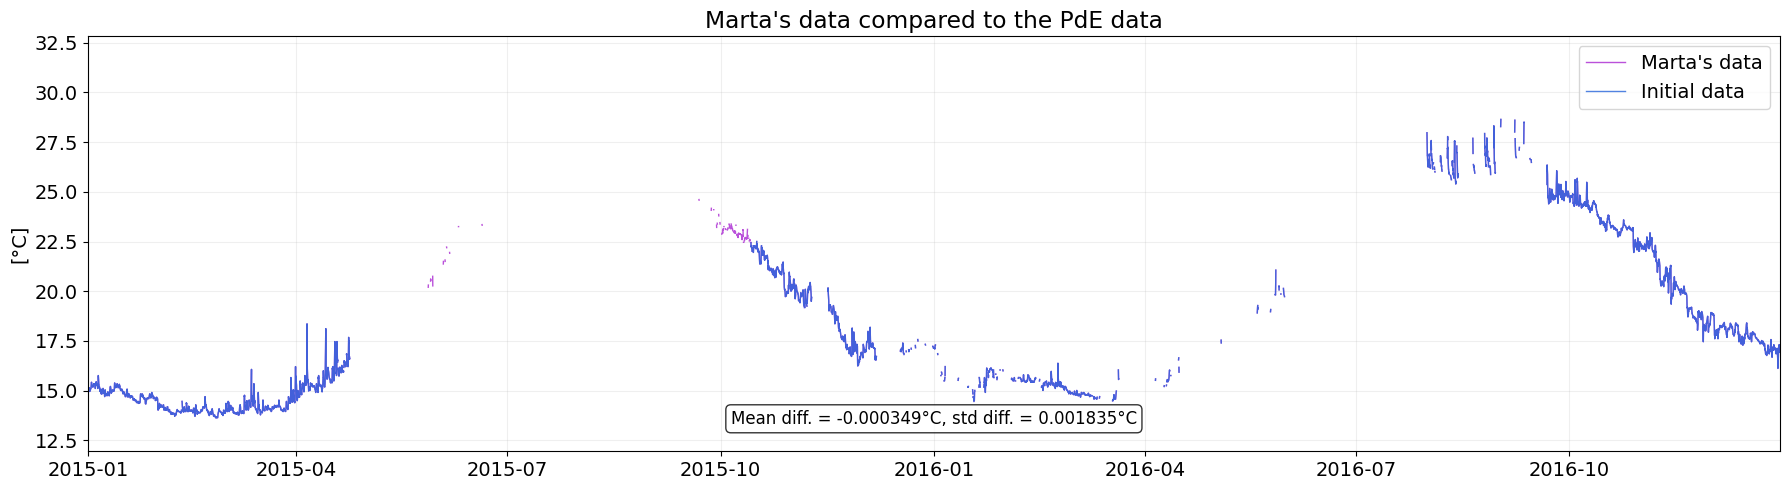

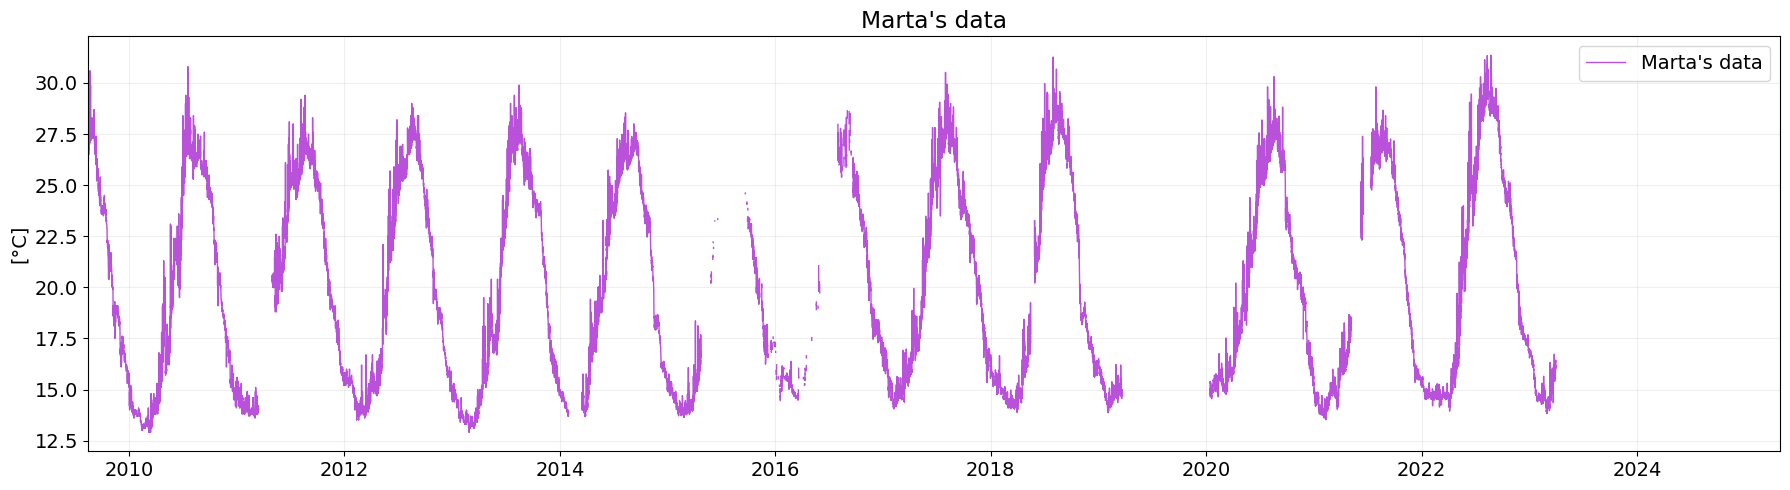

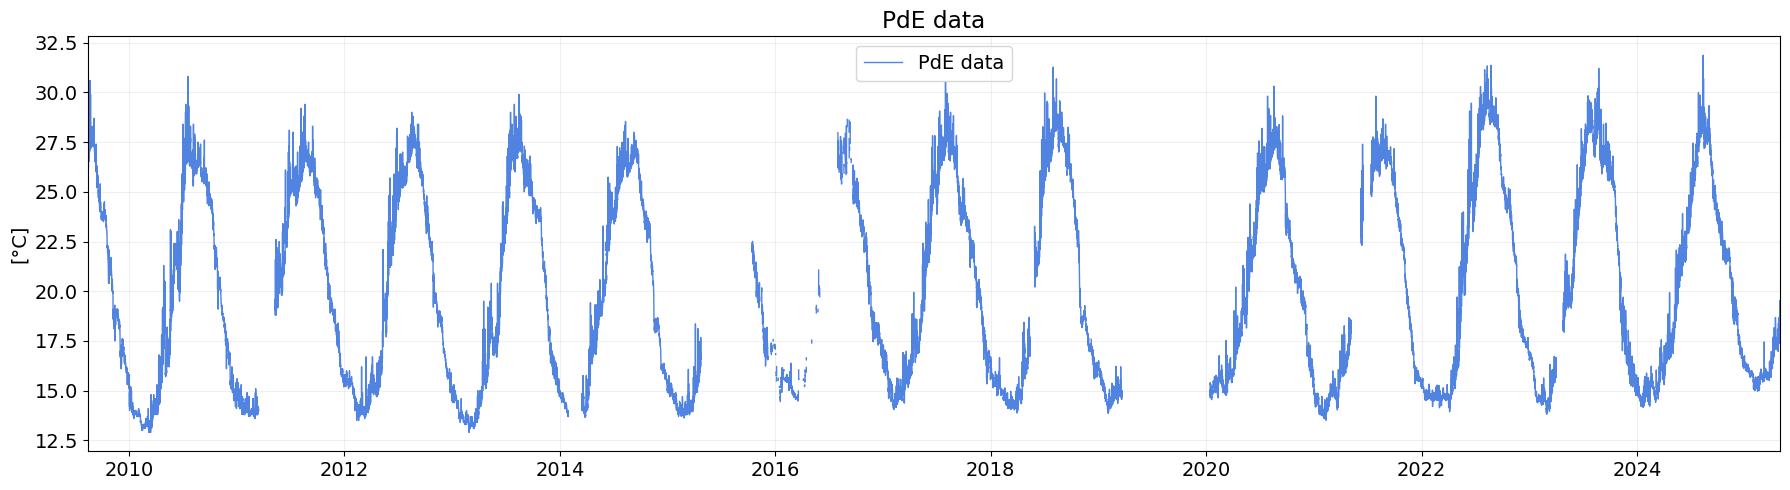

In [ ]:
import matplotlib.pyplot as plt
from data_plotters.basic_plotting import plot_timeserie
from datetime import datetime

plot_timeserie(
    {
        "martas": ds_martas.T,
        "init": ds_initial.T,
    },
    {
        "init": ds_initial.time,
        "martas": ds_martas.time
    },
    colors={
        "init": "#2665DACC",
        "martas": "#A926D1CC",
    },
    labels={
        "init": "Initial data",
        "martas": "Marta's data"
    },
    title="Marta's data compared to the PdE data",
    xlim=(datetime(2015, 1, 1), datetime(2016, 12, 31)),
)
plt.text(
    0.5, 0.1,                     # X and Y in axes fraction
    "Mean diff. = -0.000349°C, std diff. = 0.001835°C",
    transform=plt.gca().transAxes,
    fontsize=12,
    ha='center',                  # Horizontal alignment: center
    va='top',                     # Vertical alignment: top
    bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.8)
)

plot_timeserie(
    {
        "martas": ds_martas.T
    },
    {
        "init": ds_initial.time,
        "martas": ds_martas.time
    },
    colors={
        "init": "#2665DACC",
        "martas": "#A926D1CC",
    },
    labels={
        "init": "PdE data",
        "martas": "Marta's data"
    },
    title="Marta's data"
)
plot_timeserie(
    {
        "init": ds_initial.T,
    },
    {
        "init": ds_initial.time,
        "martas": ds_martas.time
    },
    colors={
        "init": "#2665DACC",
        "martas": "#A926D1CC",
    },
    labels={
        "init": "PdE data",
        "martas": "Marta's data"
    },
    title="PdE data"
)
plt.show()

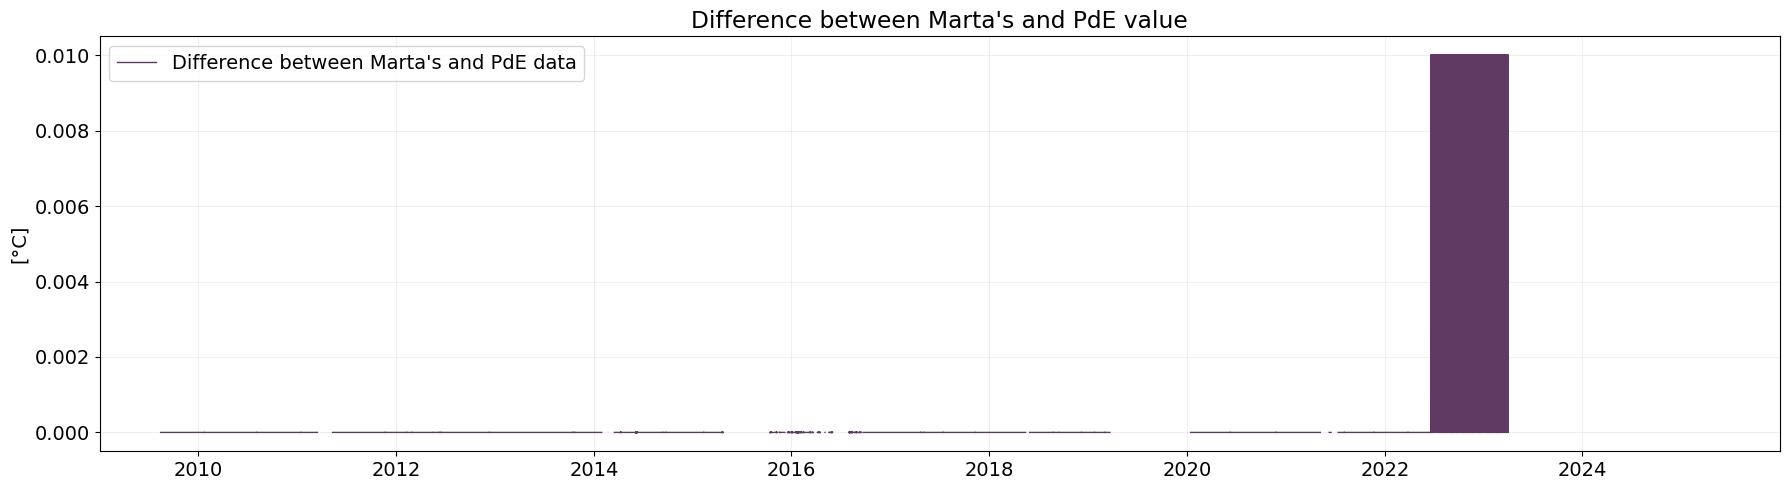

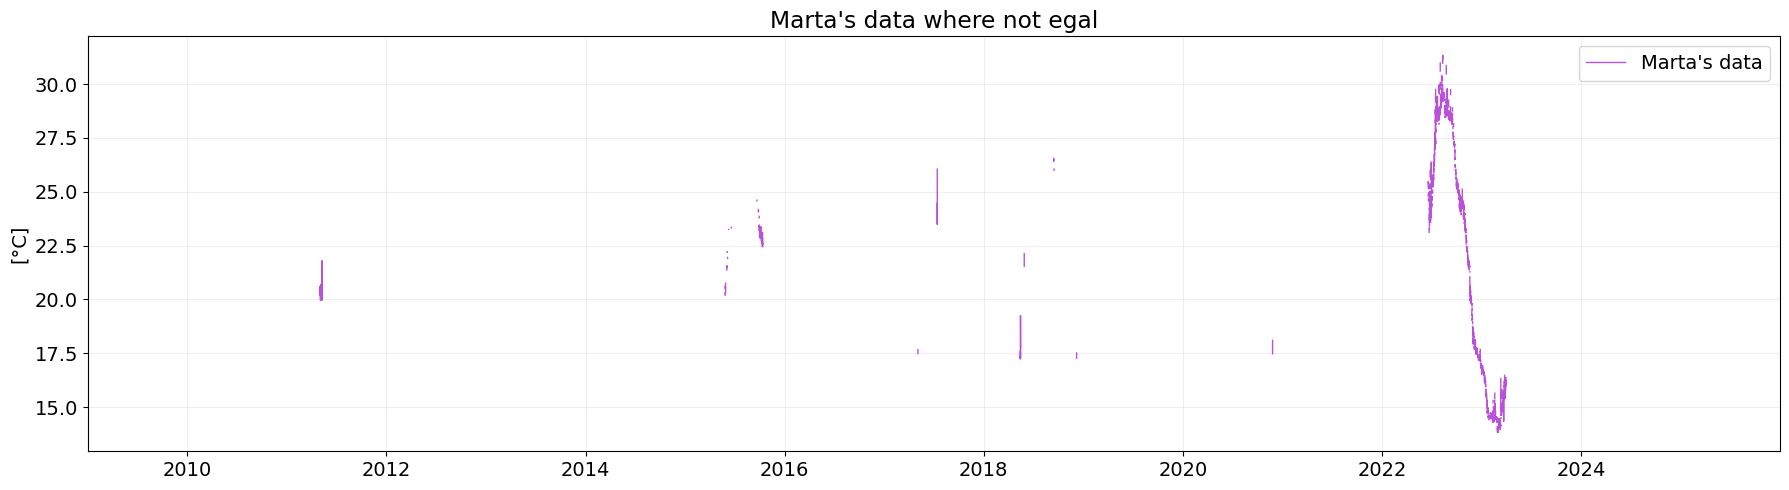

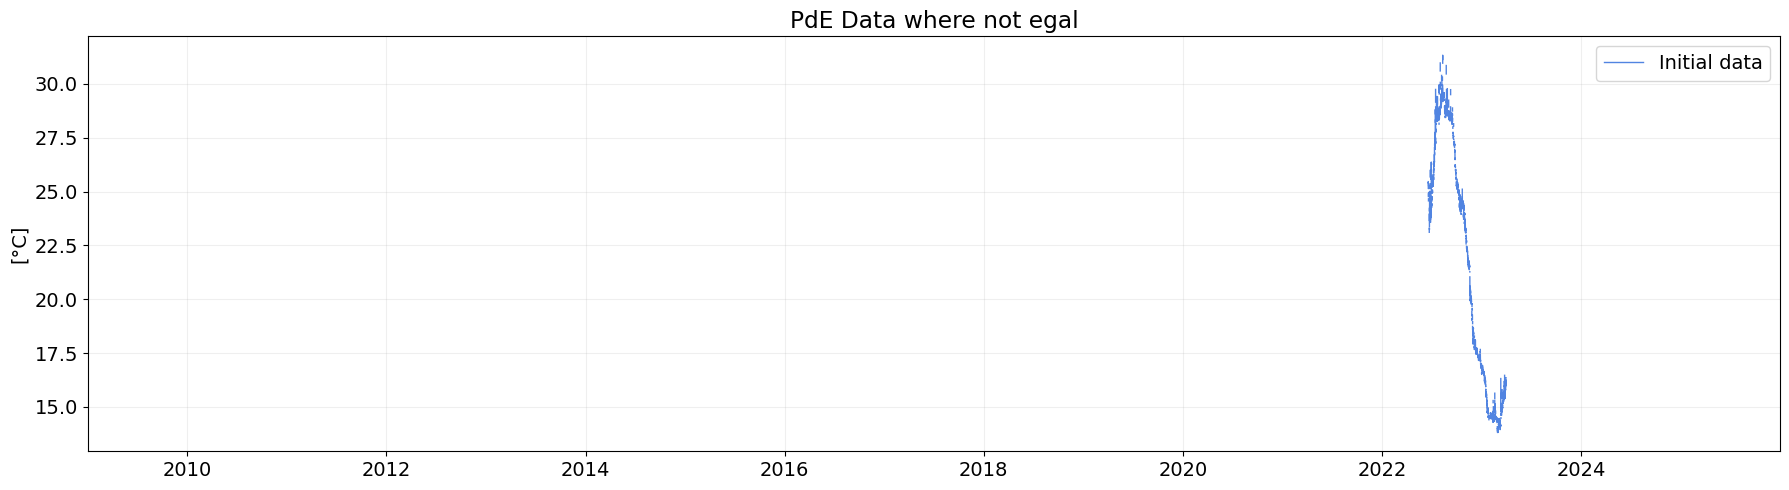

In [ ]:
import matplotlib.pyplot as plt
from data_plotters.basic_plotting import plot_timeserie
from datetime import datetime

plot_timeserie(
    {
        "martas": ds_martas.T.where(ds_initial.T != ds_martas.T),
        # "init": ds_initial.T.where(ds_initial.T != ds_martas.T),
    },
    {
        "init": ds_initial.time.where(ds_initial.T != ds_martas.T),
        "martas": ds_martas.time.where(ds_initial.T != ds_martas.T)
    },
    colors={
        "init": "#2665DACC",
        "martas": "#A926D1CC",
    },
    labels={
        "init": "Initial data",
        "martas": "Marta's data"
    },
    title="Marta's data where not egal",
    xlim=(datetime(2009, 1, 1), datetime(2025, 12, 31)),
)
plot_timeserie(
    {
        # "martas": ds_martas.T.where(ds_initial.T != ds_martas.T),
        "init": ds_initial.T.where(ds_initial.T != ds_martas.T),
    },
    {
        "init": ds_initial.time.where(ds_initial.T != ds_martas.T),
        "martas": ds_martas.time.where(ds_initial.T != ds_martas.T)
    },
    colors={
        "init": "#2665DACC",
        "martas": "#A926D1CC",
    },
    labels={
        "init": "Initial data",
        "martas": "Marta's data"
    },
    title="PdE Data where not egal",
    xlim=(datetime(2009, 1, 1), datetime(2025, 12, 31)),
)
plt.show()